<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/coin_counter/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 26 kB/s 


In [2]:
import cv2
import numpy as np
from urllib.request import urlopen
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [50]:
def show_figure(img, size=(10, 10)):
    plt.figure(figsize=size)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
url = f"https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/coin_counter/res/manual/10bani.jpg"
req = urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
base = cv2.imdecode(arr, -1)

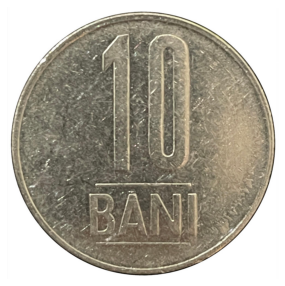

In [10]:
show_figure(base)

In [46]:
url = f"https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/coin_counter/res/manual/conis.jpg"
req = urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
coins = cv2.imdecode(arr, -1)

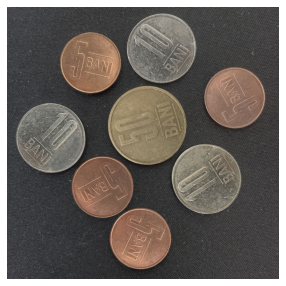

In [47]:
show_figure(coins)

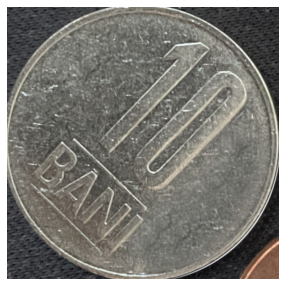

In [48]:
roi = (100, 950, 665, 665)
coin = coins[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
show_figure(coin)

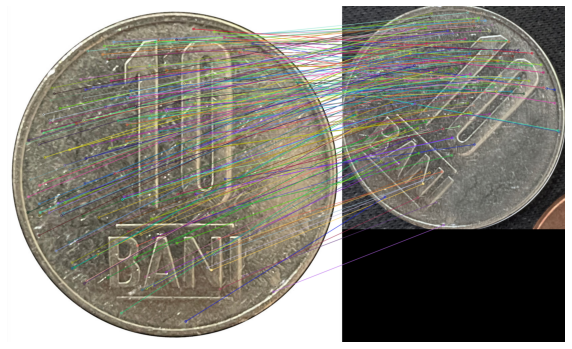

In [51]:
im1 = base.copy()
im2 = coin.copy()

WCANNY = False

sift = cv2.xfeatures2d.SIFT_create(5000)
bf = cv2.BFMatcher()

g1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
g2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

if WCANNY:
    b1 = cv2.GaussianBlur(g1, (5, 5), 0)
    b2 = cv2.GaussianBlur(g2, (5, 5), 0)

    g1 = cv2.Canny(b1, 30, 150)
    g2 = cv2.Canny(b2, 30, 150)


k1, d1 = sift.detectAndCompute(g1, None)
k2, d2 = sift.detectAndCompute(g2, None)

matches = bf.knnMatch(d1, d2, k=2)

good_matches = []
for m1, m2 in matches:
  if m1.distance < 0.2*m2.distance:
    good_matches.append([m1])

SIFT_matches = cv2.drawMatchesKnn(im1, k1, im2, k2, good_matches, None, flags=2)

show_figure(SIFT_matches)